# Artificial Neural Network #
Full implementation of artificial neurons and MLPs without the use of in built functions or related libraries


## Library Imports ##
* Numpy
* Pandas
* Mathplot

In [1]:
import numpy as np                         # For Array Operations
import pandas as pd                        # For DataFrame Operations
import matplotlib.pyplot as plt            # For Plotting

### Defining Global Functions ###
| Function Name          | Use                                |
| :--------------------: | :--------------------------------: |
|activation_function     | Defines few activation functions   |
|activation_derivative   | Pre-evaluated derivatives          |
|loss_function           | Defines few loss functions         |
|loss_derivative         | Pre-evaluated derivatives          |


**Available activation functions :**
* Sigmoid
* Tanh
* ReLU
* Leaky ReLU
* Softmax


**Available Loss functions :**
* MSE
* Binary Cross Entropy
* Categorical Cross Entropy


In [2]:
# Defining the activation functions and their derivatives
def activation_function(function_name):
    try:                                                                  
        if (function_name.lower() == 'sigmoid'):
            return lambda x: 1 / (1 + np.exp(-x))
        elif (function_name.lower() == 'tanh'):
            return lambda x: np.tanh(x)
        elif (function_name.lower() == 'relu'):
            return lambda x: np.maximum(0, x)   
        elif (function_name.lower() == 'leaky_relu'):
            return lambda x: np.where(x > 0, x, 0.01 * x)
        elif (function_name.lower() == 'softmax'):
            return lambda x: np.exp(x) / np.sum(np.exp(x), axis=0)
    except Exception as e:
        print(f"Error finding activation function: {e}")
        return None
        
def activation_derivative(function_name):
    try:
        if (function_name.lower() == 'sigmoid'):
            return lambda x: x * (1 - x)
        elif (function_name.lower() == 'tanh'):
            return lambda x: 1 - np.tanh(x) ** 2
        elif (function_name.lower() == 'relu'):
            return lambda x: np.where(x > 0, 1, 0)
        elif (function_name.lower() == 'leaky_relu'):
            return lambda x: np.where(x > 0, 1, 0.01)
        elif (function_name.lower() == 'softmax'):
            return lambda x: x * (1 - x)
    except Exception as e:
        print(f"Error finding activation derivative function: {e}")
        return None
        
# Defining the loss functions and their derivatives      
def loss_function(function_name):
    try:
        if (function_name.lower() == 'mean_squared_error'):
            return lambda y_true, y_pred: np.mean((y_true - y_pred) ** 2)
        elif (function_name.lower() == 'binary_crossentropy'):
            return lambda y_true, y_pred: -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        elif (function_name.lower() == 'categorical_crossentropy'):
            return lambda y_true, y_pred: -np.sum(y_true * np.log(y_pred), axis=1).mean()
    except Exception as e:
        print(f"Error finding loss function: {e}")
        return None

def loss_derivative(function_name):
    try:
        if (function_name.lower() == 'mean_squared_error'):
            return lambda y_true, y_pred: 2 * (y_pred - y_true) / y_true.size
        elif (function_name.lower() == 'binary_crossentropy'):
            return lambda y_true, y_pred: -(y_true / y_pred) + ((1 - y_true) / (1 - y_pred))
        elif (function_name.lower() == 'categorical_crossentropy'):
            return lambda y_true, y_pred: y_pred - y_true
    except Exception as e:
        print(f"Error finding loss derivative function: {e}")
        return None

### Layer Class ###
To utilise a deep network of neuron layers, we can define a layer class with variable parameters like, number of neurons in the layer (inputs) and the number of outputs

In [3]:
class Layer:
    # Initializing the layer with weights and biases with a default activation function (Sigmoid)
    def __init__(self, input_size, output_size, function_name='sigmoid'):
        self.W = np.random.randn(output_size, input_size) * 0.01    # Initializing weights with small random values
        self.B = np.zeros((output_size, 1))                         # Initializing biases with zeros
        self.function_name = function_name                          # Storing the activation function name
        
    # Defining the feed forward function for the layer
    def feed_forward(self, X):
        self.input = X                                             # Storing the input for back propagation
        self.Z = np.dot(self.W, X) + self.B                         # Simply implementing the formula Z = WX + B
        self.A = activation_function(self.function_name)(self.Z)    # Applying the activation function to Z to get A
        return self.A
    
    # Defining the back propagation function for the layer
    def back_propagation(self, dA):
        m = self.input.shape[1]                                              # To utilise batch processing (Averaging over m samples per batch)
        dL = dA * activation_derivative(self.function_name)(self.A) # Using the chain rule to calculate the derivative of the loss with respect to Z - (dL = dL/dZ)
        self.dW = np.dot(dL, self.input.T) / m                               # Gradient of the loss with respect to W - (dL/dW = dL/dZ * dZ/dW)
        self.dB = np.sum(dL, axis=1, keepdims=True) / m             # Gradient of the loss with respect to B - (dL/dB = dL/dZ * dZ/dB)
        dX = np.dot(self.W.T, dL)                                   # Gradient of the loss with respect to Input - (dL/dX = dL/dZ * dZ/dX)          
        
        return dX                                                   # Return the gradient of the loss with respect to the input for the next layer

### Testing the Neural Network ###
Here, we pass in a random input data and define the ground truth for the model to train on


In [4]:
input_data = np.array([[1,2], [4, 6], [7, 8], [2, 10], [5, 1]])  # Input data with shape (5, 2)
true_output = np.array([[0, 0], [1, 1]])
print(input_data.shape, true_output.shape)  # Print the shape of input and output data

(5, 2) (2, 2)


We choose a 3 layer architecture, each with sigmoid activation along with binary cross entropy loss
Through the following implementation we try:

* A simple Neural Network with 1 Hidden Layer
* binary classification of input from 5 neurons
* Training over two iterations
* Plotting the loss function to assess the model


First Prediction:
[[0.50000223 0.5000018 ]
 [0.49999452 0.4999956 ]]

Loss Value [1] : 0.6932

Backpropagation:
[[ 8.18923638e-05  8.18922174e-05]
 [-1.10179204e-04 -1.10179007e-04]
 [ 2.28358827e-04  2.28358420e-04]
 [ 1.15638376e-05  1.15638166e-05]]
[[ 0.00841316  0.00841314]
 [ 0.00367524  0.00367524]
 [-0.00162171 -0.00162171]]
[[ 2.00000893  2.00000719]
 [-2.00002193 -2.00001762]]

Weights and Biases:
Layer 1 Weights:
[[ 0.00274955 -0.008543   -0.01051352 -0.00169636 -0.01604441]
 [-0.00258981  0.01697894 -0.00154625 -0.00251925 -0.00577624]
 [ 0.01658035 -0.00648947  0.00777678  0.00182664  0.00534528]
 [-0.00879233 -0.01051762  0.00881667 -0.00472205  0.00789038]]
Layer 1 Biases:
[[0.]
 [0.]
 [0.]
 [0.]]
Layer 2 Weights:
[[ 0.00937223 -0.00946552  0.02172773  0.00334462]
 [ 0.00082778 -0.00831083  0.01239645 -0.00450989]
 [ 0.0041515  -0.00855094 -0.0069416   0.00201385]]
Layer 2 Biases:
[[0.]
 [0.]
 [0.]]
Layer 3 Weights:
[[ 4.84081443e-03  2.20485194e-03 -3.26028068e-03]
 [-

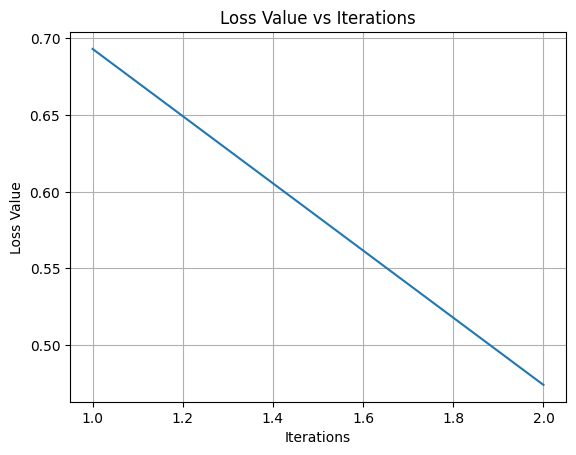

In [5]:
Layer1 = Layer(5,4, 'relu') # Input layer
Layer2 = Layer(4,3, 'relu') # Hidden Layer
Layer3 = Layer(3,2, 'sigmoid') # Output Layer

# Defining a Neural Network

L1 = Layer1.feed_forward(input_data)    # Feed forward the input data through the first layer
L2 = Layer2.feed_forward(L1)            # Feed forward the output of the first layer to the second layer
L3 = Layer3.feed_forward(L2)            # Feed forward the output of the second layer to the third layer
print()
print("First Prediction:")
print(L3)
print()

# Backpropagation
losses = []  # List to store loss values
losses.append(loss_function('binary_crossentropy')(true_output, L3))  # Calculate the loss value using binary crossentropy
print("Loss Value [1] : {loss:.4f}".format(loss = losses[0]))
print()
dL3 = loss_derivative('binary_crossentropy')(true_output, L3)       # Calculate the derivative of the loss with respect to the output
dL2 = Layer3.back_propagation(dL3)                              # Back propagate the error to the second layer
dL1 = Layer2.back_propagation(dL2)                              # Back propagate the error to the first layer
dI = Layer1.back_propagation(dL1)                       # Back propagate the error to the input layer
print("Backpropagation:")
print(dL1)                                                          # Print the gradient of the loss with respect to the input of the first layer
print(dL2)                                                          # Print the gradient of the loss with respect to the input of the second layer
print(dL3)                                                          # Print the gradient of the loss with respect to the output of the third layer
print()
print("Weights and Biases:")
print("Layer 1 Weights:")
print(Layer1.W)                     # Print the weights of the first layer
print("Layer 1 Biases:")
print(Layer1.B)                     # Print the biases of the first layer
print("Layer 2 Weights:")
print(Layer2.W)                     # Print the weights of the second layer
print("Layer 2 Biases:")
print(Layer2.B)                     # Print the biases of the second layer
print("Layer 3 Weights:")
print(Layer3.W)                     # Print the weights of the third layer
print("Layer 3 Biases:")
print(Layer3.B)                     # Print the biases of the third layer
print()

# Updating Weights and Biases
Layer1.W -= Layer1.dW   # Update the weights of the first layer
Layer1.B -= Layer1.dB   # Update the biases of the first layer
Layer2.W -= Layer2.dW   # Update the weights of the second layer
Layer2.B -= Layer2.dB   # Update the biases of the second layer
Layer3.W -= Layer3.dW   # Update the weights of the third layer
Layer3.B -= Layer3.dB   # Update the biases of the third layer
print("Updated Weights and Biases:")
print("Layer 1 Weights:")
print(Layer1.W)                     # Print the weights of the first layer
print("Layer 1 Biases:")
print(Layer1.B)                     # Print the biases of the first layer
print("Layer 2 Weights:")
print(Layer2.W)                     # Print the weights of the second layer
print("Layer 2 Biases:")
print(Layer2.B)                     # Print the biases of the second layer
print("Layer 3 Weights:")
print(Layer3.W)                     # Print the weights of the third layer
print("Layer 3 Biases:")
print(Layer3.B)                     # Print the biases of the third layer
print()
print("Second Prediction:")
L1 = Layer1.feed_forward(input_data)    # Feed forward the input data through the first layer
L2 = Layer2.feed_forward(L1)            # Feed forward the output of the first layer to the second layer
L3 = Layer3.feed_forward(L2)            # Feed forward the output of the second layer to the third layer
print(L3)                               # Print the output of the third layer after updating the weights and biases
print()
losses.append(loss_function('binary_crossentropy')(true_output, L3))  # Calculate the loss value using binary crossentropy
print("Loss Value [2] : {loss:.4f}".format(loss = losses[1]))  # Calculate the loss value using binary crossentropy
print()

#Plotting the loss values
plt.plot([1,2], losses)                 # Plot the loss values
plt.title('Loss Value vs Iterations')   # Set the title of the plot
plt.xlabel('Iterations')                # Set the x-axis label
plt.ylabel('Loss Value')                # Set the y-axis label
plt.grid()                              # Add grid lines to the plot
plt.show()                              # Show the plot

## Neural Network & Data Definition ##
Now, we will try to create a Neural Network Class to be organise and train the model over custom architectures.

For this project, we will utilise the MNIST number dataset and test our model's architecture over the classification metric.

This part will cover two major steps:
|S.No. | Step | Use |
| ---- | ---- | --- |
| 1.   | Data Frame Definition | To process the images in batches and parse input to the input layer|
| 2.   | Neural Network Class  | To organise the code and implement the training steps over loop  |


### # Step - 1 ###
<h4> (A) Creating a Data-Frame and functions for input handling <h4>

In [6]:
# Defining an IDX file reader for the MNIST dataset
import struct


# Image Loader
def load_idx_images(filename):
    
    with open(filename, 'rb') as f:
        # The first 4 bytes contain the magic number
        magic = struct.unpack('>I', f.read(4))[0]
        # The next 4 bytes contain the number of images
        num_images = struct.unpack('>I', f.read(4))[0]
        # Next, number of rows and columns
        num_rows = struct.unpack('>I', f.read(4))[0]
        num_cols = struct.unpack('>I', f.read(4))[0]
        # Read the rest of the data:
        # Each pixel is stored as an unsigned byte.
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num_images, num_rows*num_cols)
    return images

# Label Loader
def load_idx_labels(filename):
    
    with open(filename, 'rb') as f:
        magic = struct.unpack('>I', f.read(4))[0]
        num_labels = struct.unpack('>I', f.read(4))[0]
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels



<h4> (B) Loading the Dataset <h4>

In [7]:
images = load_idx_images(r'D:\Coding\DSGxRMS\Artificial Neural Network\Dataset\train-images.idx3-ubyte').astype('float64') / 255.0  # Load the MNIST training images
labels = load_idx_labels(r'D:\Coding\DSGxRMS\Artificial Neural Network\Dataset\train-labels.idx1-ubyte')  # Load the MNIST training labels

# Creating the Dataframe
df = pd.DataFrame(images)  # Create a DataFrame from the images
df['label'] = labels  # Add the labels to the DataFrame

print(df.head())  # Print the first 5 rows of the DataFrame
print(df.shape)  # Print the shape of the DataFrame
print(df.describe())

     0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  label  
0  0.0  0.0  0.0  0.0  0.0      5  
1  0.0  0.0  0.0  0.0  0.0      0  
2  0.0  0.0  0.0  0.0  0.0      4  
3  0.0  0.0  0.0  0.0  0.0      1  
4  0.0  0.0  0.0  0.0  0.0      9  

[5 rows x 785 columns]
(60000, 785)
             0        1        2        3        4        5        6        7  \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0

### # Step - 2 ###
<h4> Defining the Neural Network <h4>

In [8]:
class NeuralNetwork:
    def __init__(self, epochs = 1000, batch_size = 64, learning_rate = 0.01):
        
        # Initializing the neural network with a list of layers
        
        self.layers= []                      # List to store the layers of the neural network
        Layer1 = Layer(784, 512, 'relu')     # Input layer with 784 input neurons and 512 output neurons
        Layer2 = Layer(512, 256, 'relu')     # Hidden layer with 512 input neurons and 256 output neurons
        Layer3 = Layer(256, 128, 'relu')     # Hidden layer with 256 input neurons and 128 output neurons
        Layer4 = Layer(128, 10, 'softmax')   # Output layer with 128 input neurons and 10 output neurons (for 10 classes)
        
        # Append the layers to the list
        self.layers.append(Layer1)  
        self.layers.append(Layer2)
        self.layers.append(Layer3)
        self.layers.append(Layer4)
        
        self.losses = []                     # List to store the loss values during training
        self.batch_size = batch_size         # Default batch size for training
        self.epochs = epochs                 # Default number of epochs for training
        self.learning_rate = learning_rate   # Default learning rate for training
        
        
    def batch_generator(self, df):
        # Function to generate batches of data from the DataFrame
        for idx in range(0, len(df), self.batch_size):
            yield df.iloc[idx : idx + self.batch_size]
    
    def process_batch(self, batch_df):
        # Function to process a batch of data
        X_batch = batch_df.iloc[:, :784].values             # Shape (batch_size, 784)
        X_batch = X_batch.T                                 # Transpose to match the input shape (784, batch_size)
        
        labels = batch_df['label'].values                   # Shape (batch_size,)
        
        # Encoding the labels
        num_classes = 10
        num_examples = len(labels)
        Y_batch = np.zeros((num_examples, num_classes))
        
        for i, label in enumerate(labels):
            Y_batch[i, label] = 1
            
        Y_batch = Y_batch.T                      # Transpose to shape (10, batch_size)
        
        return X_batch, Y_batch


    def train(self, df):
        # Training the neural network on the given DataFrame
        
        for epoch in range(1, self.epochs + 1):
            loss = 0
            batch_number = 0
            
            for batch_df in self.batch_generator(df):
                X_batch, Y_batch = self.process_batch(batch_df)  # Process the batch of data
                
                A = X_batch
                
                for layer in self.layers:
                    A = layer.feed_forward(A)
                
                output = A

                loss += np.mean(loss_function('categorical_crossentropy')(Y_batch, output))  # Calculate the loss value using categorical crossentropy
                batch_number += 1
                dA = loss_derivative('categorical_crossentropy')(Y_batch, output)
                
                for layer in reversed(self.layers):
                    dA = layer.back_propagation(dA)
                    
                for layer in self.layers:
                    layer.W -= self.learning_rate * layer.dW  # Update the weights of the layer
                    layer.B -= self.learning_rate * layer.dB  # Update the biases of the layer
                
            # Average loss over the batches
            loss /= batch_number
            self.losses.append(loss)                          # Append the loss value to the list of losses
            
            if epoch % 10 == 0:                                 # Print the loss value every 10 epochs
                print(f"Epoch {epoch}/{self.epochs}, Loss: {loss:.5f}")
            
        plt.plot(range(1, len(self.losses) + 1), self.losses)   # Plot the loss values
        plt.title('Loss Value vs Epochs')                       # Set the title of the plot
        plt.xlabel('Epochs')                                    # Set the x-axis label
        plt.ylabel('Loss Value')                                # Set the y-axis label
        plt.grid()                                              # Add grid lines to the plot
        plt.show()                                              # Show the plot
    
    def predict(self, df):
        # Function to make predictions on the given DataFrame
        X_batch = df.iloc[:, :784].values
        X_batch = X_batch.T          
        
        
        A = X_batch
        
        for layer in self.layers:
            A = layer.feed_forward(A)
            
        predictions = np.argmax(A, axis=0)            # Get the index of the maximum value in each column (predicted class)
        return predictions            
            

## Training the Network ##
Utilising the above defined architecture, we can now use the network to be trained on the MNIST dataset. For the purpose of this project, the entire dataset is used for the training purpose and a separate dataset will be used to test the model accuracy

Epoch 10/100, Loss: 13.33710
Epoch 20/100, Loss: 1.13489
Epoch 30/100, Loss: 0.53754
Epoch 40/100, Loss: 0.31620
Epoch 50/100, Loss: 0.23035
Epoch 60/100, Loss: 0.19758
Epoch 70/100, Loss: 0.17863
Epoch 80/100, Loss: 0.17856
Epoch 90/100, Loss: 0.18184
Epoch 100/100, Loss: 0.16759


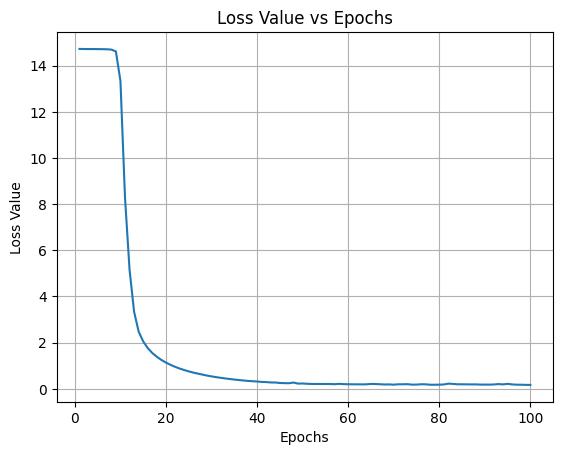

Training Completed!


In [9]:
nn = NeuralNetwork(epochs=100, batch_size=64, learning_rate=0.1)  # Create an instance of the NeuralNetwork class with self defined parameters
nn.train(df)                    # Train the neural network on the DataFrame
print("Training Completed!")    # Print a message indicating that the training is completed

### Testing the Trained Model ###
Here we implement the trained model by passing in the test images and labels from the MNIST library itself containing 10k images. 

In [10]:
images = load_idx_images(r'D:\Coding\DSGxRMS\Artificial Neural Network\Dataset\t10k-images.idx3-ubyte').astype('float64') / 255.0  # Load the MNIST training images
labels = load_idx_labels(r'D:\Coding\DSGxRMS\Artificial Neural Network\Dataset\t10k-labels.idx1-ubyte')                            # Load the MNIST training labels

# Creating the Dataframe
df = pd.DataFrame(images)         # Create a DataFrame from the images
df_labels = pd.DataFrame(labels)  # Create a DataFrame from the labels


prediction = nn.predict(df)

accuracy = 0
sample_size = 0
for label in df_labels.iloc[:].values:
    sample_size += 1                                # Count the number of samples
    if label[0] == prediction[sample_size - 1]:     # Check if the predicted label matches the true label
        accuracy += 1

accuracy = accuracy / sample_size * 100             # Calculate the accuracy as a percentage
print(f"Accuracy: {accuracy:.2f}%")  # Print the accuracy of the predictions



Accuracy: 96.52%


In [ ]:
# Print the header
print(f"{'True Label':^15}{'Predicted Label':^15}")
print("-" * 30)  # Separator line

# Print the data
idx = 0
for label in df_labels.iloc[:10].values:
    print(f"{label[0]:^15}{prediction[idx]:^15}")  # Align each column
    idx += 1

True Label     Predicted Label
------------------------------
7              7              
2              2              
1              1              
0              0              
4              4              
1              1              
4              4              
9              7              
5              8              
9              9              
